<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EA%B3%A0%EA%B8%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%B2%95%EA%B3%BC_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [ ]:
df = X.copy()
print(df.shape)
df.head()

(48842, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [ ]:
# 수치형 데이터
print(df.select_dtypes(include='number').columns)
numeric_cols = df.select_dtypes(include='number').columns
df.describe()

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# 범주형 데이터
print(df.select_dtypes(include='object').columns)
categorical_cols = df.select_dtypes(include='object').columns
df.describe(include='object')

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


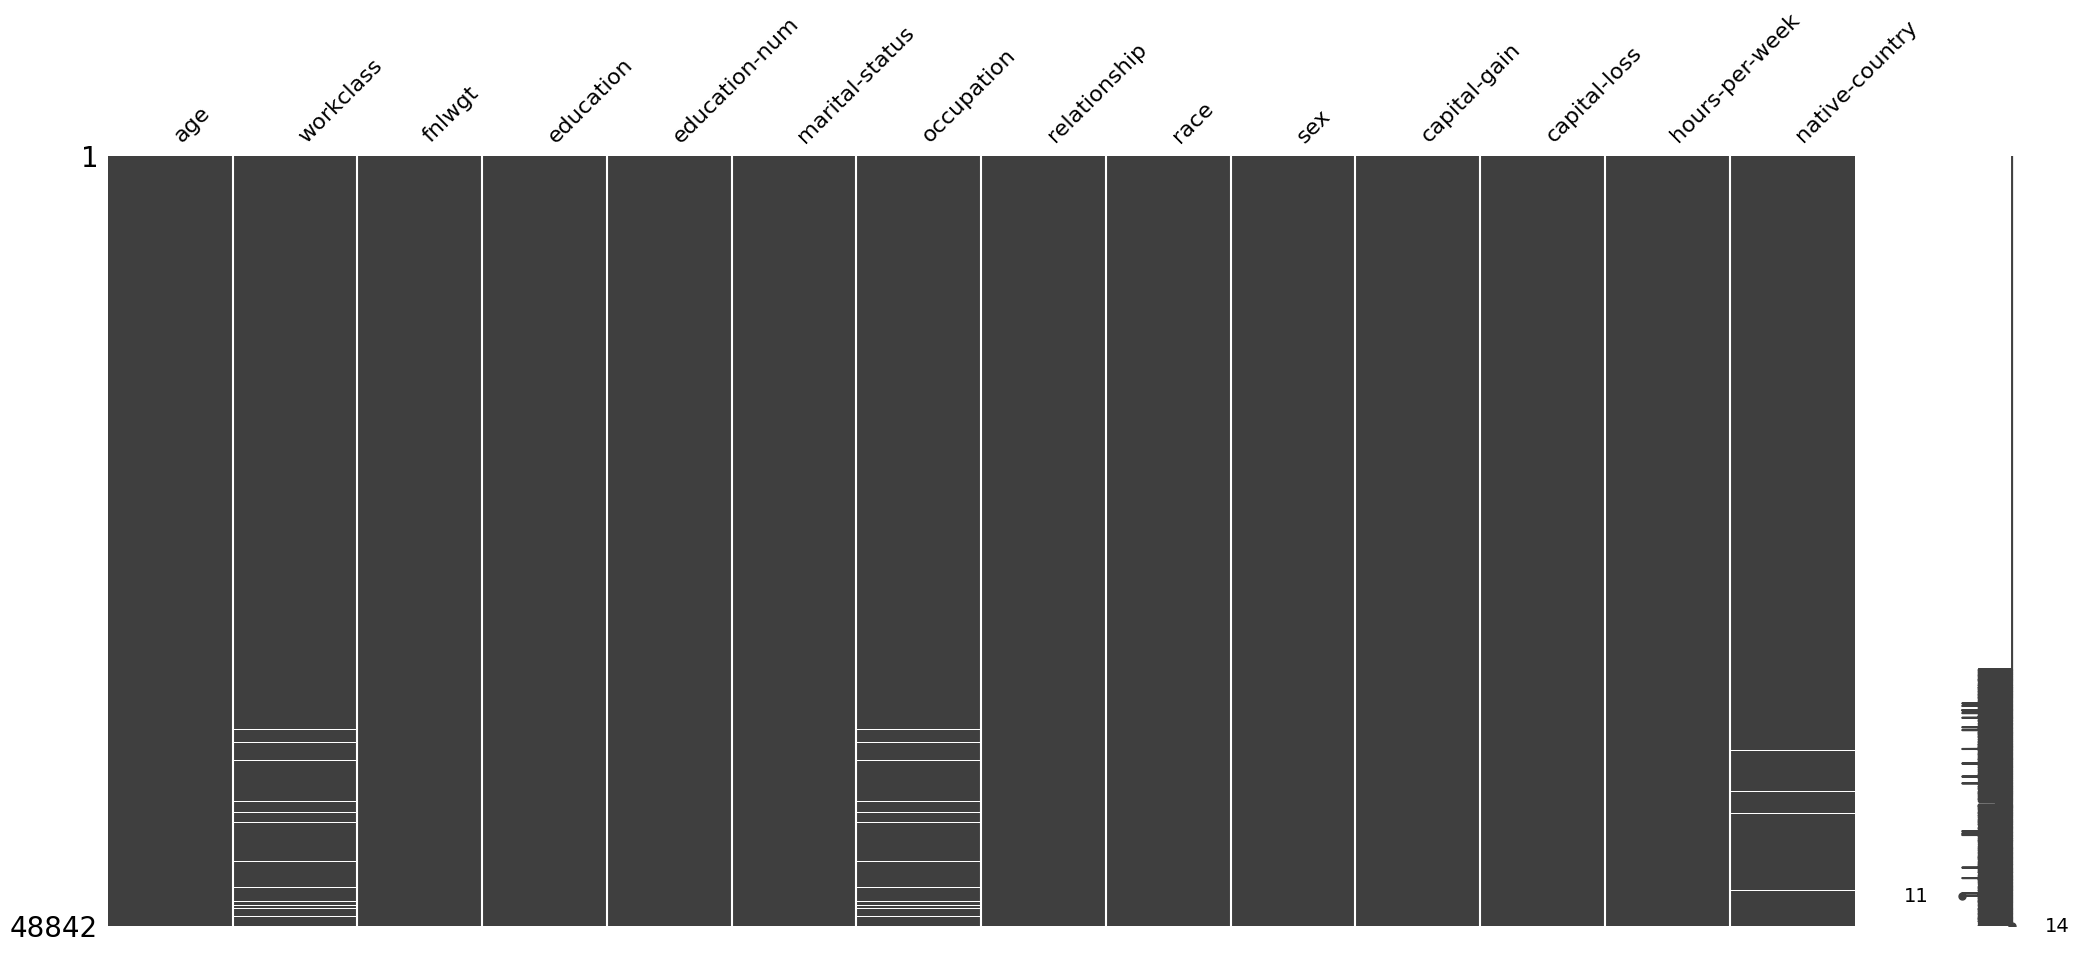

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# 결측치 시각화
msno.matrix(df)
plt.show()

In [ ]:
2# 결측치 여부확인
na_cols = df.isna().mean()
na_cols[na_cols > 0]

,0
workclass,0.019717
occupation,0.019778
native-country,0.005610


수치형 컬럼 수 6


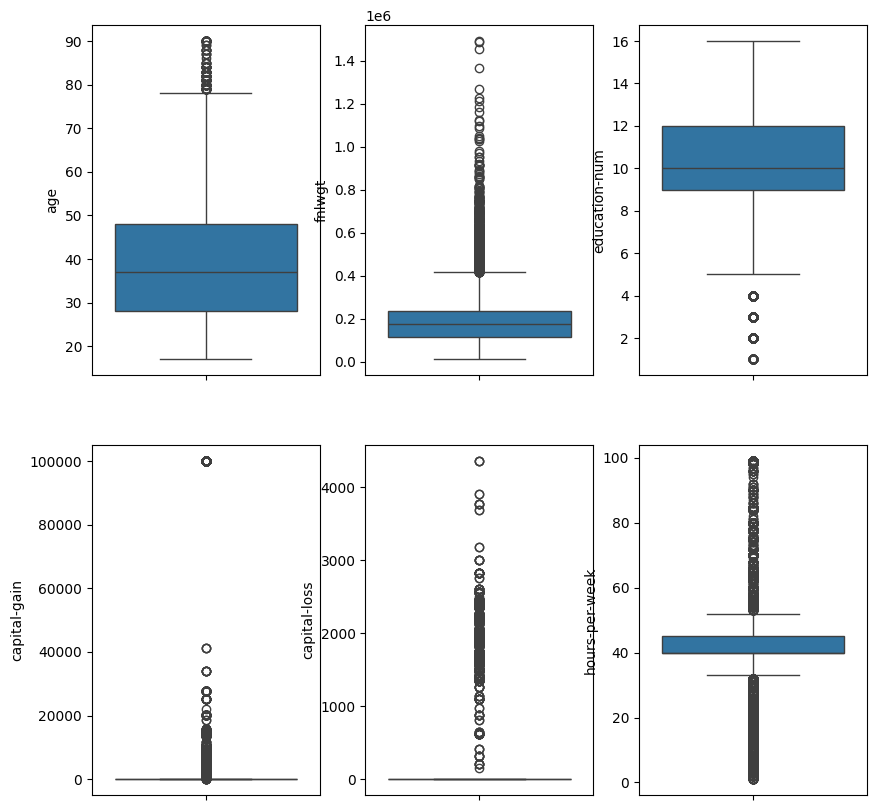

In [ ]:
# 이상치 확인 boxplot
df = X.copy()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
print(f'수치형 컬럼 수 {len(numeric_cols)}')
# 화면을 분할해서 수치형 데이터들에 대한 boxplot  subplot (행,열,축번호)
for i in range(len(numeric_cols)):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[numeric_cols[i]])
plt.show()

In [ ]:
# 결측치 처리 규칙 - 대처
# 이상치 제거( 통계적으로 이상치라고 하더라도.. 도메인 지식상.. 이상치로 볼수없는 컬럼은 제외 )
# 현 시점에서는 결측치와 이상치를 전부 처리함

In [ ]:
# 범주형 데이터 결측치 처리  - 최빈값
df=X.copy()
for col in categorical_cols:
  df.fillna({col: df[col].mode()[0]}, inplace=True)

df[categorical_cols].isna().sum()

,0
workclass,0
education,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
native-country,0


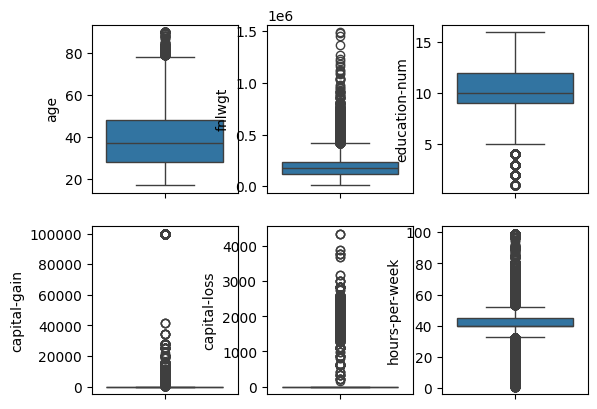

In [ ]:
df = X.copy()
for idx,col in enumerate(numeric_cols):
  plt.subplot(2,3,idx+1)
  sns.boxplot(df[col])
plt.show()

In [ ]:
# 이상치 제거  IQR
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_cols:
  df = remove_outliers(df,col)

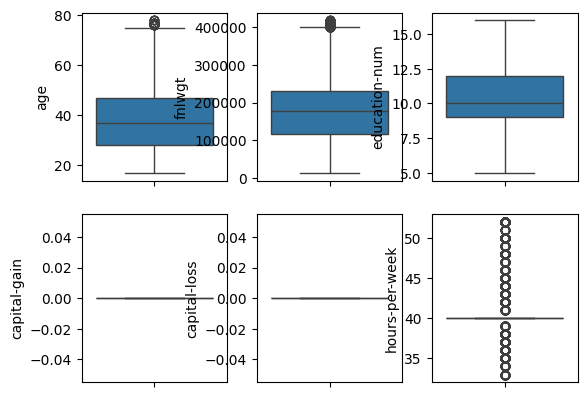

In [ ]:
for idx,col in enumerate(numeric_cols):
  plt.subplot(2,3,idx+1)
  sns.boxplot(df[col])
plt.show()

<Axes: >

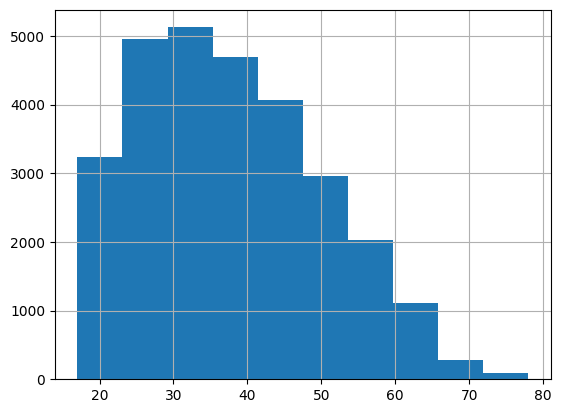

In [ ]:
df['age'].hist()

<Axes: >

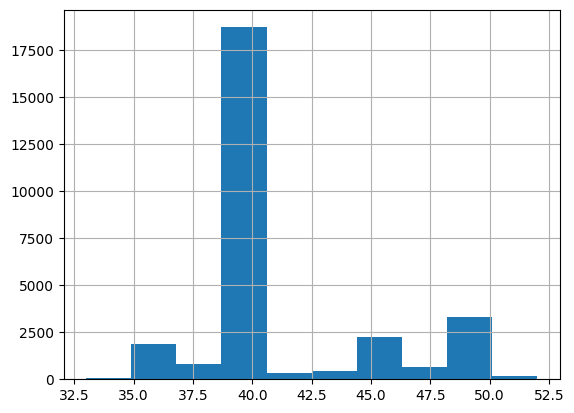

In [ ]:
df['hours-per-week'].hist()

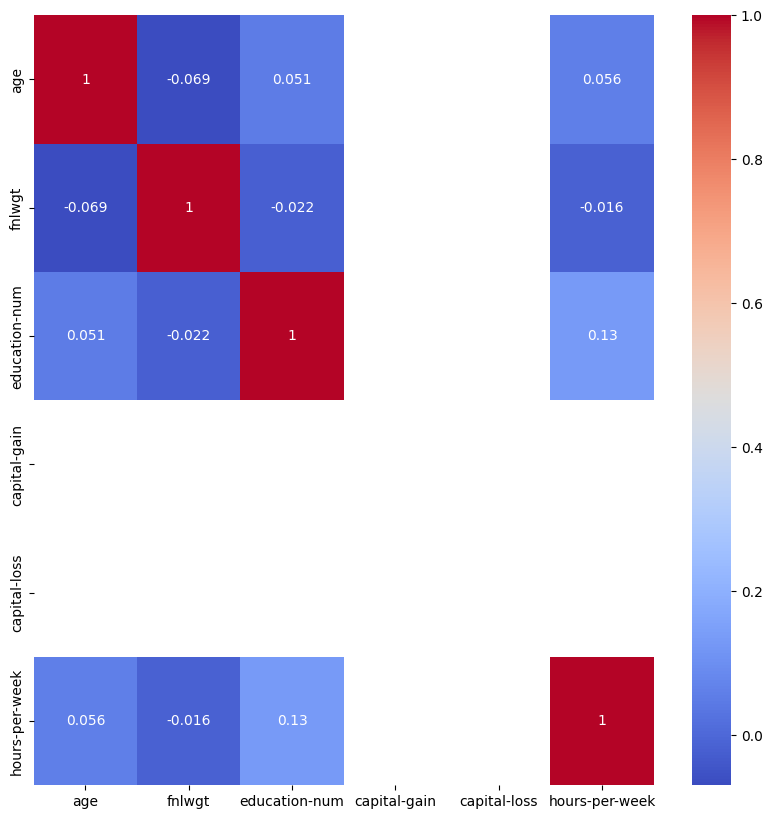

In [ ]:
# 변수간의 상관관계(연속형 변수만)
correlation = df[numeric_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# 서울시 따릉이 대어 분석
```
년 월 일 요일 시간별 대여현황
필요시 추가데이터는 크롤링도 사용가능
지도로 시각화 : 대여장소등  Folium
```

# 로컬 주피터에서 다음 코드로 다량의 데이터를 다운로드 가능
```
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

url = 'https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do#'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)
# 자바스크립트 실행
try:
    page_num = 128
    driver.execute_script(f"downloadFile('{page_num}')")
    print('다운로드 성공')
except Exception as e:
    print('error :',e)
finally:
    driver.quit()
```

In [ ]:
import pandas as pd
import numpy as np
url = '/content/drive/MyDrive/data/서울특별시 공공자전거 대여이력 정보_2412.csv'
df = pd.read_csv(url,encoding='cp949')
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,0,2024-12-01 00:02:41,04560,양평동성원아파트,0,2,625.10,1997,M,내국인,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,0,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,0,2,0.00,1983,NaN,내국인,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,0,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,0,3,890.00,1991,\N,내국인,ST-294,ST-1539,일반자전거
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,0,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),0,4,671.61,1994,\N,내국인,ST-834,ST-1511,일반자전거
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,0,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,0,3,49.16,\N,M,내국인,ST-1083,ST-1684,일반자전거


In [ ]:
# 데이터 타입변환  object - date
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277919 entries, 0 to 2277918
Data columns (total 17 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(13)
memory usage: 295.4+ MB


In [ ]:
# 나이 컬럼 추가
# df['age'] = 2025 - df['생년']
# 생년에 숫자가 아닌 값일 있는지 여부
# df['생년'].unique()
(df['생년'] == '\\N').mean(), df.shape ,(df['생년'] == '\\N').sum()

(np.float64(0.14332028487404513), (2277919, 17), np.int64(326472))

In [ ]:
df = df[df['생년'] != '\\N']
df['생년'] = df['생년'].astype('int')

<Axes: >

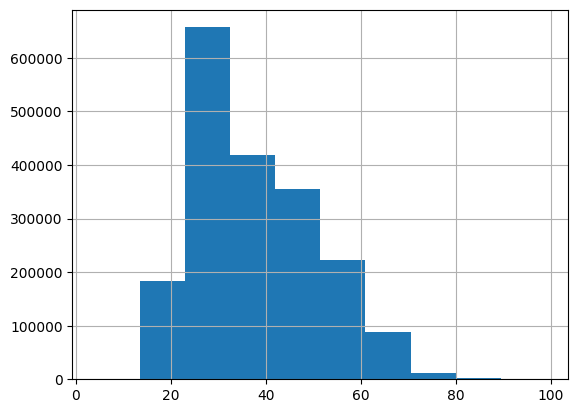

In [ ]:
df['나이'] = 2025-df['생년']
df[(df['나이'] > 0) & (df['나이'] < 100)]['나이'].hist()

In [ ]:
df = df[(df['나이'] > 0) & (df['나이'] < 100)]

13.333333333333334

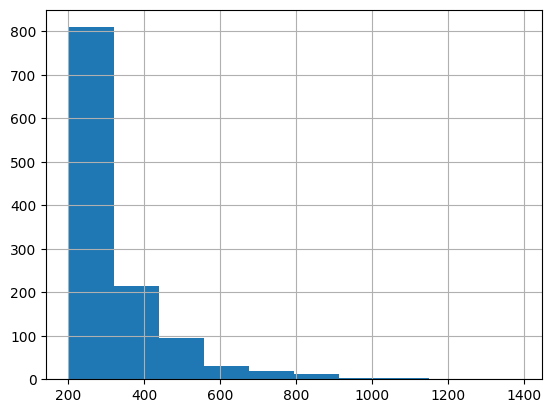

In [ ]:
# 이용시간 분석
# 이상치 여부 - boxplot hist
df[df['이용시간(분)'] > 200]['이용시간(분)'].hist()
# 자전거를 하루이상 대여한 기간은 제외 - 이상치
df = df[df['이용시간(분)'] < 800]

In [ ]:
# 이용시간 이용거리 나이 통계
df[['이용시간(분)','이용거리(M)','나이']].describe()

,이용시간(분),이용거리(M),나이
count,1.942538e+06,1.942538e+06,1.942538e+06
mean,1.764935e+01,1.851596e+03,3.750023e+01
std,2.369541e+01,2.199810e+03,1.286385e+01
min,0.000000e+00,0.000000e+00,4.000000e+00
25%,5.000000e+00,7.515700e+02,2.800000e+01
50%,9.000000e+00,1.224190e+03,3.400000e+01
75%,1.900000e+01,2.115677e+03,4.700000e+01
max,1.389000e+03,1.520409e+05,9.900000e+01


In [ ]:
# 성별, 자전거 구분
df['성별'].value_counts()

,count
성별,
M,940023
\N,483929
F,459881
m,243
f,190


In [ ]:
# 범주형 데이터중에 \n , \\n을 결측치 처리
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  df[col].apply(lambda x: x.replace('\n','').replace('\\n',''))

<ipython-input-124-52b4df283a4e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'\n':np.nan, '\\n':np.nan}, inplace=True, regex=True)


In [ ]:
df['성별'].value_counts()

,count
성별,
m,795260
f,393274


In [ ]:
# 범주형 데이터의 모든 문자열을 소문자로 변경
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  df[col] = df[col].str.lower()

TypeError: replace() argument 2 must be str, not float

In [ ]:
df['성별'].value_counts()

,count
성별,
m,940266
\n,483929
f,460071


In [ ]:
# 공간(대여소나 시간)정보, 사용자 정보
# 중간정리 를 통해 전처리

# 1.단순결측치나 중복데이터는 제거
url = '/content/drive/MyDrive/data/서울특별시 공공자전거 대여이력 정보_2412.csv'
original = pd.read_csv(url,encoding='cp949')

In [ ]:
df = original.copy()
# 모두 소문자로변환
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  df[col] = df[col].str.lower()
# 2. \n \\n 이런종류의 데이터는 nan으로 대처하고 drop
df.replace(r'\n',np.nan,regex=True,inplace=True)
df.replace(r'\\n',np.nan,regex=True,inplace=True)
df.dropna(inplace=True)
# 3. 나이 컬럼 추가
df['생년'] = df['생년'].astype('int')
df['나이'] = 2025-df['생년']
# 4. 0 < age < 100
df = df[(df['나이'] > 0) & (df['나이'] < 100)]
# 5. 이용시간 200분 이하로
df = df[df['이용시간(분)'] < 200]
# 6 알맞은 데이터 타입 변환
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [ ]:
# 시각화를대비해서 한글화
import sys
import matplotlib.pyplot as plt
# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2


<Figure size 1000x400 with 0 Axes>

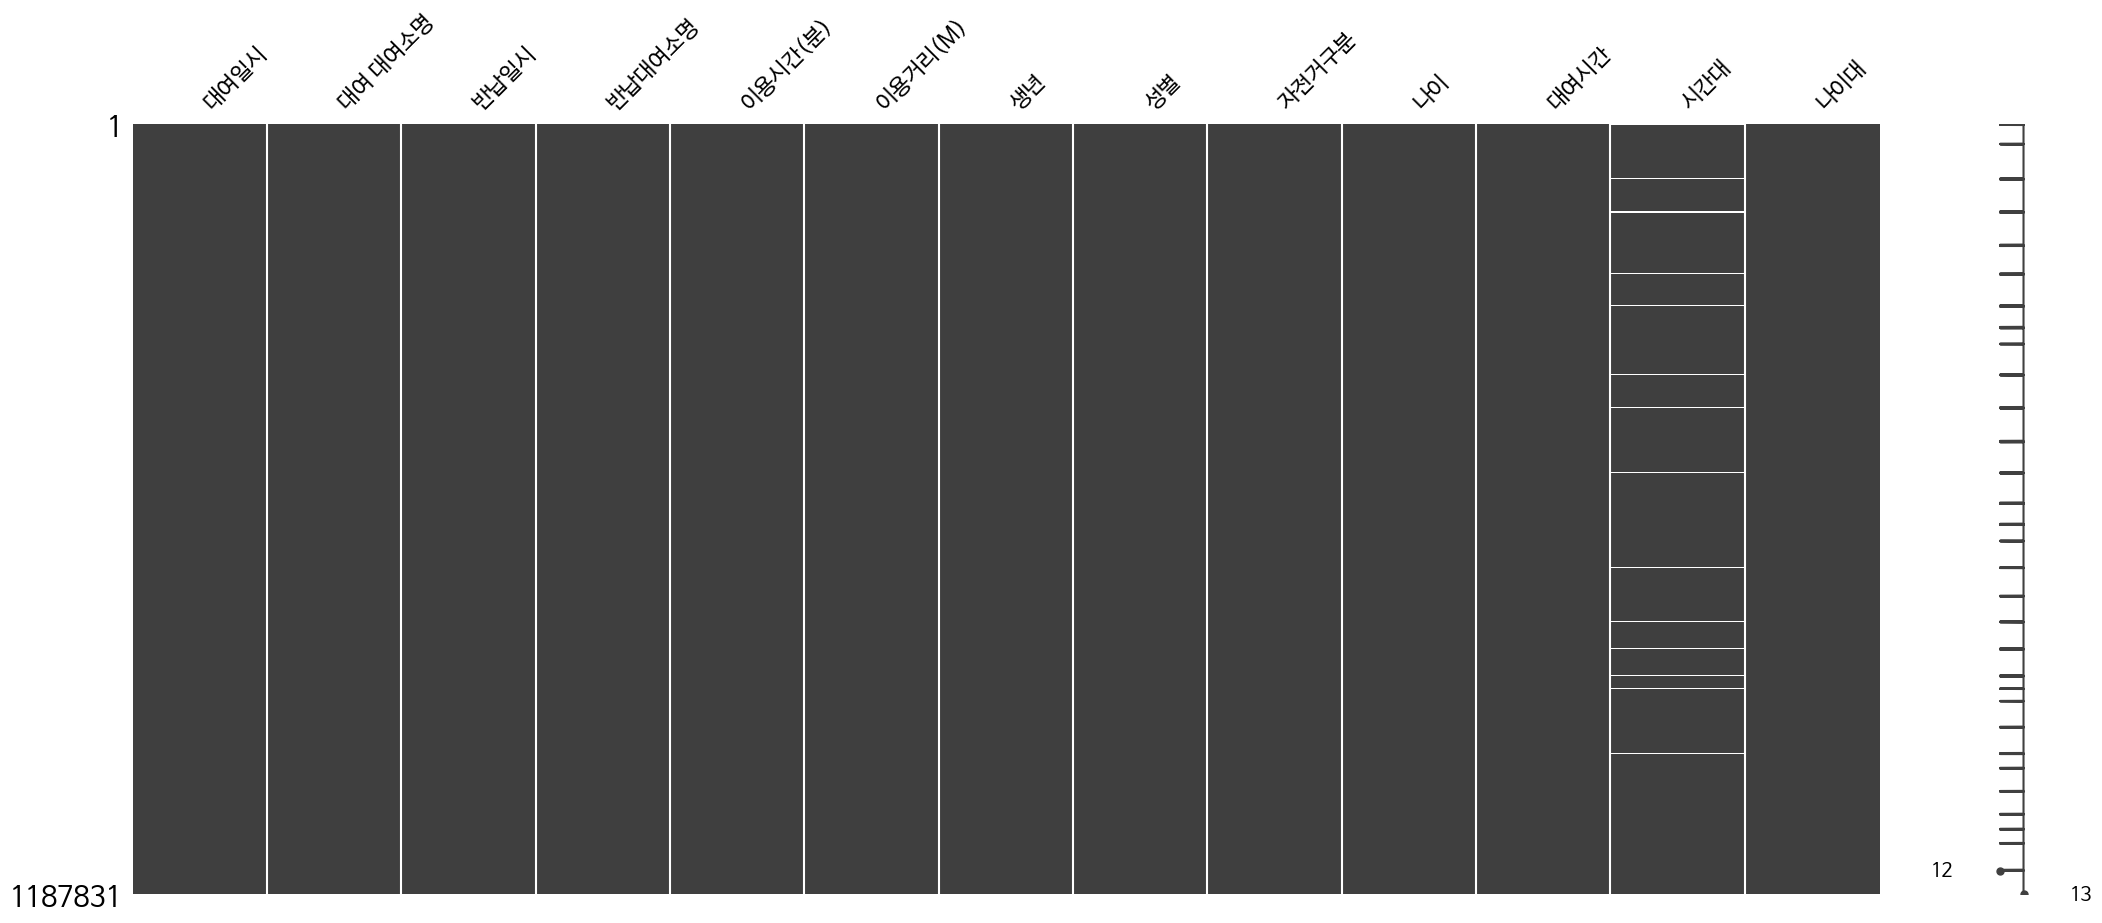

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# 필요없는 컬럼 삭제
remove_cols = ['자전거번호','대여 대여소번호','대여거치대','반납대여소번호','반납거치대','대여대여소ID','반납대여소ID','이용자종류']
df.drop(remove_cols,axis=1,inplace=True)
# df.drop(columns=remove_cols,inplace=True)

# 결측치 시각화
plt.figure(figsize=(10,4))
msno.matrix(df)
plt.show()

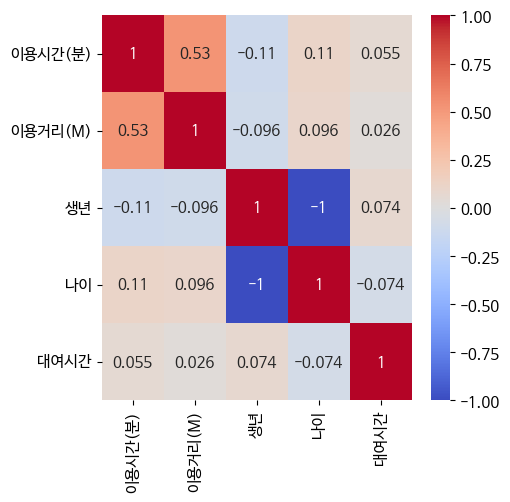

In [ ]:
# 수치형데이터들의 상관관계
plt.figure(figsize=(5,5))
numeric_cols = df.select_dtypes(include='number').columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 대여시간 시간만 추출
df['대여시간'] = df['대여일시'].dt.hour
# cut을 이용해서 x개 구간으로 나눔 0 6 9 12 15 18 24   시작+1 부터 마지막번호
df['시간대'] = pd.cut(df['대여시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
# 시간대별 대여횟수
time_bin_counts =  df['시간대'].value_counts()
# 대여소별 대여 횟수
rent_station_counts =  df['대여 대여소명'].value_counts()
# 성별 평균 이용시간 및 거리
gender_avg_time_distance = df.groupby('성별')[['이용시간(분)','이용거리(M)']].mean()
# 나이를 구간화 분포
df['나이대'] = pd.cut(df['나이'],bins=[-1,20,30,40,50,100],labels=['10대','20대','30대','40대','50대이상'])
age_distribution = df['나이대'].value_counts()

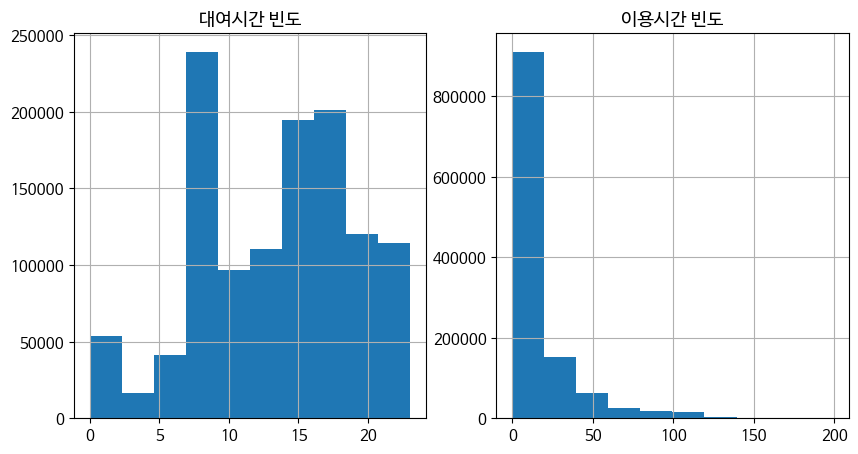

In [ ]:
#이용시간 분포 히스토그램
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('대여시간 빈도')
df['대여시간'].hist()

plt.subplot(1,2,2)
plt.title('이용시간 빈도')
df['이용시간(분)'].hist()
plt.show()

In [ ]:
rent_station_counts

,count
대여 대여소명,
마곡나루역 2번 출구,6231
마곡나루역 5번출구 뒤편,4744
마곡나루역 3번 출구,4145
"발산역 1번, 9번 인근 대여소",3320
롯데월드타워(잠실역2번출구 쪽),3112
...,...
새정이마을버스정류장 앞,4
구룡터널 입구(개포1단지아파트),2
중앙보훈병원역3번출구,2


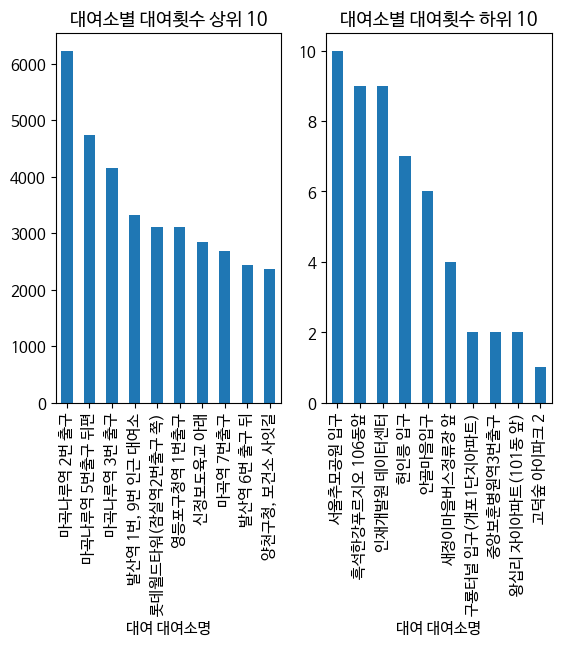

In [ ]:
# 대여소별 대여횟수 top 10
plt.subplot(1,2,1)
plt.title('대여소별 대여횟수 상위 10')
rent_station_counts[:10].plot(kind='bar')

plt.subplot(1,2,2)
plt.title('대여소별 대여횟수 하위 10')
rent_station_counts[-10:].plot(kind='bar')

plt.show()

<Axes: xlabel='나이대'>

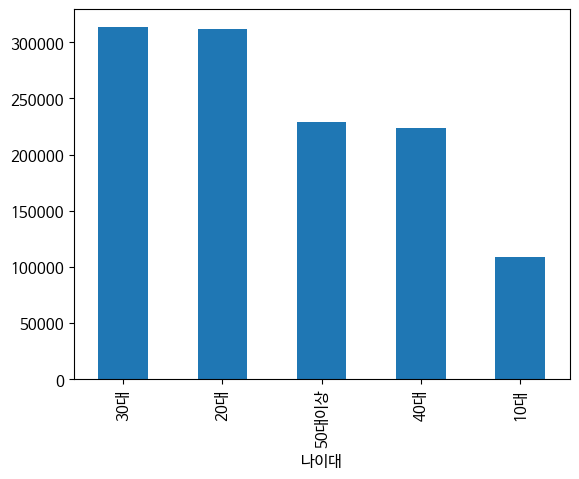

In [ ]:
# 성별
df['나이대'].value_counts().plot(kind='bar')

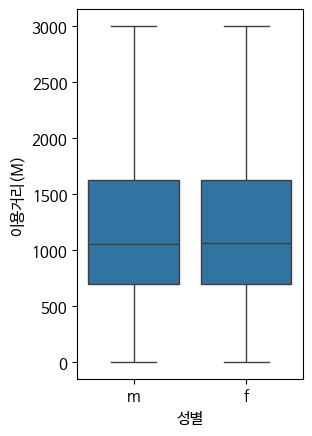

In [ ]:
# 성별 이용거리 boxplot
plt.subplot(1,2,1)
sns.boxplot(x='성별',y='이용거리(M)',data=df[df['이용거리(M)']<3000])
plt.show()

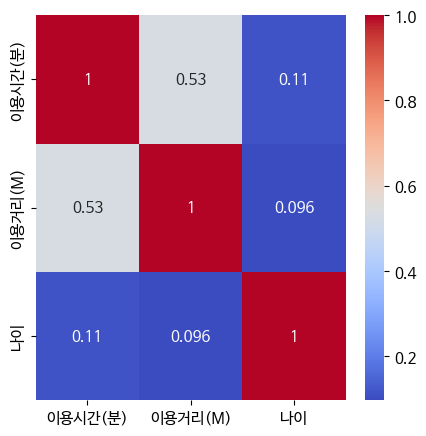

In [ ]:
# 수치형 변수의 상관관계
corr = df[['이용시간(분)','이용거리(M)','나이']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 이용시간대별 상세 분석
```
대여시간
대여분
반납시간
반납분
```

In [ ]:
df['대여분'] = df['대여일시'].dt.minute
df['반납시간'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute

In [ ]:
df['대여시간대'] = pd.cut(df['대여시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
df['반납시간대'] = pd.cut(df['반납시간'],bins=[-1,6,9,12,15,18,24],labels=['새벽','아침','오전','오후','저녁','밤'])
# 분단위로 구간을 나누기
df['대여분구간'] = pd.cut(df['대여분'],bins=[-1,15,30,45,60],labels=['15분이하','15분~30분','30분~45분','45분이상'])
print(f"대여시간대별 {df['대여시간대'].value_counts().index}")
print(f"반납시간대별 {df['반납시간대'].value_counts().index}")

대여시간대별 CategoricalIndex(['저녁', '아침', '밤', '오후', '오전', '새벽'], categories=['새벽', '아침', '오전', '오후', '저녁', '밤'], ordered=True, dtype='category', name='대여시간대')
반납시간대별 CategoricalIndex(['저녁', '밤', '아침', '오후', '오전', '새벽'], categories=['새벽', '아침', '오전', '오후', '저녁', '밤'], ordered=True, dtype='category', name='반납시간대')


<Axes: xlabel='대여시간대'>

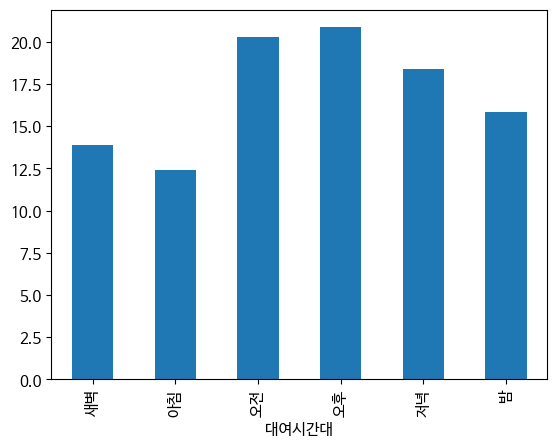

In [ ]:
# 시간대별 평균 이용시간(대여)
df.groupby('대여시간대',observed=True )['이용시간(분)'].mean()
df.groupby('대여시간대',observed=True )['이용시간(분)'].mean().plot(kind='bar')

<Axes: xlabel='대여요일'>

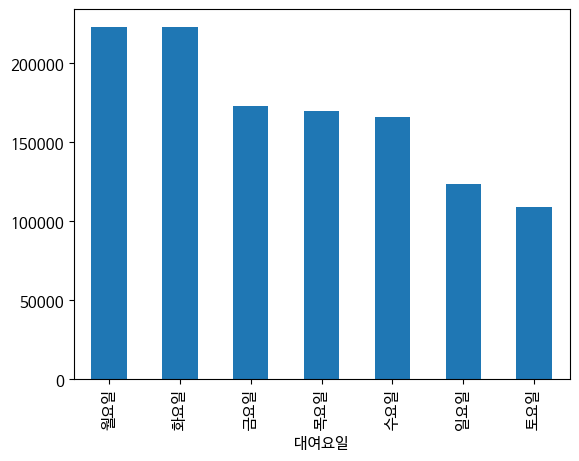

In [ ]:
temp = dict(zip(range(7), ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']))
# df['대여일시'].dt.weekday.apply(lambda x: temp[x])
df['대여요일'] =  df['대여일시'].dt.weekday.map(temp)
df['반납요일'] =  df['반납일시'].dt.weekday.map(temp)
df['대여요일'].value_counts().plot(kind='bar')


In [ ]:
# cross tab 요일별 대여소 이용 밀도
pd.crosstab(df['대여요일'],df['대여 대여소명'])

대여 대여소명,(시립)고덕평생학습관,(재)fiti시험연구원,3호선 매봉역 3번출구앞,419민주묘지 입구사거리,419민주묘지역,419민주묘지역 1번출구,419탑 앞,"500번,507번 버스 종점 앞",63스퀘어,7번가피자 서교망원점,...,흑석역 1번출구,흑석역 4번출구,흑석한강푸르지오 106동앞,흑석한강푸르지오(110동),흥국사 정류장,희성오피앙,희훈타워빌 앞,힐스테이트에코,힐스테이트창경궁 아파트 앞,힐스테이트클래시안아파트
대여요일,,,,,,,,,,,,,,,,,,,,,
금요일,48,122,122,30,28,28,49,14,147,107,...,44,21,1,17,5,34,87,270,80,48
목요일,47,119,124,36,17,36,55,5,131,119,...,53,36,2,17,2,33,85,222,68,68
수요일,57,103,120,21,22,39,44,15,116,103,...,54,24,0,5,5,29,68,213,59,54
월요일,78,184,144,39,23,45,63,12,192,171,...,65,32,0,17,2,49,99,278,78,63
일요일,46,32,52,31,22,27,69,10,37,102,...,28,18,2,4,4,37,70,128,52,56
토요일,43,36,54,23,25,23,45,6,53,67,...,72,29,4,8,3,28,52,119,35,45
화요일,68,149,158,34,24,37,56,11,204,166,...,69,39,0,10,6,43,110,317,79,80


In [ ]:
# 주중에 사용 빈도가 높음(월,화)
# 남년간의 이용률의 차이는 거의 없음
# 시간대 9시대하고 14~17시 구간이 많음

In [ ]:
df.head()

,대여일시,대여 대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),생년,성별,자전거구분,나이,...,시간대,나이대,대여분,반납시간,반납분,대여분구간,대여시간대,반납시간대,대여요일,반납요일
0,2024-12-01 00:00:13,선유도역 3번출구 앞,2024-12-01 00:02:41,양평동성원아파트,2,625.10,1997,m,일반자전거,28,...,새벽,20대,0,0,2,15분이하,새벽,새벽,일요일,일요일
6,2024-12-01 00:01:27,신트리공원 입구,2024-12-01 00:05:02,신정1동 주민센터 앞,3,547.61,1998,m,일반자전거,27,...,새벽,20대,1,0,5,15분이하,새벽,새벽,일요일,일요일
8,2024-12-01 00:01:31,센트럴파크타워 앞,2024-12-01 00:05:13,용산 파크타워 앞,3,589.79,1969,m,일반자전거,56,...,새벽,50대이상,1,0,5,15분이하,새벽,새벽,일요일,일요일
9,2024-12-01 00:01:40,천왕이펜하우스3단지 앞,2024-12-01 00:05:27,천왕역 1번 출입구 앞,3,520.86,1964,m,일반자전거,61,...,새벽,50대이상,1,0,5,15분이하,새벽,새벽,일요일,일요일
10,2024-12-01 00:00:50,양천향교역 7번출구앞,2024-12-01 00:05:29,마곡금호어울림아파트,4,810.00,2001,m,일반자전거,24,...,새벽,20대,0,0,5,15분이하,새벽,새벽,일요일,일요일


# 대한민국 주소를 해당 위경도 알아내기
```
kakao map 이용
```

In [ ]:
from urllib import request
REST_API_KEY = '5e4c6b12b36a53a95607c973b7918393'
# url = 'https://dapi.kakao.com/v2/local/search/address.json'
FORMAT = 'PK6'
url = f'https://dapi.kakao.com/v2/local/search/keyword.{FORMAT}'
H = {
    'Authorization':f'KakaoAK {REST_API_KEY}'
}
data_urlencode =  "센트럴파크타워 앞"
import requests
response = requests.get(url,headers=H,params={'query':data_urlencode})
print(response.status_code)
print(response.json())

200
{'documents': [], 'meta': {'is_end': True, 'pageable_count': 0, 'same_name': {'keyword': '센트럴파크타워 앞', 'region': [], 'selected_region': ''}, 'total_count': 0}}


In [ ]:
import pandas as pd
url = '/content/drive/MyDrive/data/서울특별시 공공자전거 대여이력 정보_2412.csv'
df = pd.read_csv(url,encoding='cp949')

rider_df =  pd.read_excel('/content/drive/MyDrive/data/공공자전거 대여소 정보(24.12월 기준).xlsx',
                          sheet_name='대여소현황',header=2)
rider_df.rename(columns={'Unnamed: 1':'대여 대여소명'},inplace=True)
rider_df = rider_df[rider_df['대여 대여소명'].notna()]
rider_df['대여 대여소명'] = rider_df['대여 대여소명'].apply(lambda x: x.strip())
df['대여 대여소명'] = df['대여 대여소명'].apply(lambda x: x.strip())

In [ ]:
merged_df = pd.merge(df,rider_df,on='대여 대여소명')[['대여 대여소명','위도','경도']]
merged_df.head()
# Folium

,대여 대여소명,위도,경도
0,선유도역 3번출구 앞,37.538460,126.894508
1,마곡수명산파크 209동 건너편,37.555450,126.826897
2,삼성생명 당산사옥 앞,37.528263,126.896629
3,등촌5단지아파트 버스정류장,37.558197,126.844261
4,천호역 10번 출구 앞,37.538582,127.122803


In [ ]:
!pip install folium

In [ ]:
# import folium
# from folium.plugins import MarkerCluster
# from tqdm import tqdm
# m = folium.Map(location=(37.566535	,126.9779692),zoom_start=12)
# marker_cluster = MarkerCluster().add_to(m)

# # for i in tqdm(range(len(merged_df))):
# for i in tqdm(range(100)):
#   folium.Marker(
#       location=[ merged_df.loc[i,'위도'], merged_df.loc[i,'경도'] ],
#       tooltip="서울시 자전거 대여소",
#       popup=merged_df.loc[i,'대여 대여소명'],
#       icon=folium.Icon(icon="cloud"),
#   ).add_to(marker_cluster)

100%|██████████| 100/100 [00:00<00:00, 4032.83it/s]


In [ ]:

merged_df = pd.merge(df,rider_df,on='대여 대여소명', how='left')[['자치구','대여 대여소명','위도','경도']]
rent_count = merged_df['대여 대여소명'].value_counts().reset_index()
merged_df = pd.merge(merged_df,rent_count,on='대여 대여소명', how='left')
merged_df = merged_df.groupby(['자치구']).agg({
    'count' : 'sum',
    '위도' : 'mean',
    '경도' : 'mean'
}).reset_index()
merged_df.head()

import folium
from folium.plugins import MarkerCluster
from tqdm import tqdm
m = folium.Map(location=(37.566535	,126.9779692),zoom_start=12)
# marker_cluster = MarkerCluster().add_to(m)

# # 구별 마커 적용
# for idx, row in merged_df.iterrows():
#   # print(row['count'], row['위도'], row['경도'])
#   folium.Marker(
#     location=[ row['위도'], row['경도'] ],
#     popup=f"{row['자치구']} : {row['count']}",
#     icon=folium.Icon(icon="info-sign", color='green'),
#   ).add_to(marker_cluster)

  # 대여횟수에 따라서 원의 크기를 조정
import numpy as np
from sklearn.preprocessing import MinMaxScaler   # 0 ~1사이로
mm = MinMaxScaler()
# 데이터 정규화
mm.fit_transform(merged_df[['count']])*500  #0 ~ 500 사이로
merged_df['count'] = mm.fit_transform(merged_df[['count']])*100

for idx, row in merged_df.iterrows():
    folium.CircleMarker(
    location=[ row['위도'], row['경도'] ],
    popup=f"{row['자치구']} : {row['count']}",
    radius = row['count'],
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity = 0.6
  ).add_to(m)
m

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit_transform(merged_df[['count']])*500
merged_df['count'] = mm.fit_transform(merged_df[['count']])*500
merged_df['count']

,count
0,8.972615
1,71.167471
2,0.226450
3,500.000000
4,16.113335
5,84.457213
6,70.073497
7,17.124755
8,102.563748
9,11.599846
